# Machine Learning 
# Recommendation System - EDA

This is exploratory data analysis for the dataset used in this project. 

### Data description
This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

Per the UCI Machine Learning Repository, this data was made available by Dr Daqing Chen, Director: Public Analytics group. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK.

Downloadable from https://www.kaggle.com/datasets/carrie1/ecommerce-data

The dataset contains information about 541910 customers over eight attributes: InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country.

* Skeleton code, images from ProjectPro.

In [129]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [85]:
#read csv data
df = pd.read_csv('data.csv',encoding= 'unicode_escape')
df.shape

(541909, 8)

In [86]:
#view first 5 rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [87]:
#null check
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

# Cleaning the data

In [88]:
#drop nulls in description column
df_new = df.dropna(subset=['Description'])

In [89]:
#descriptive stats check
df_new.describe()

,Quantity,UnitPrice,CustomerID
count,540455.000000,540455.000000,406829.000000
mean,9.603129,4.623519,15287.690570
std,218.007598,96.889628,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [90]:
#remove negetive qauntity, negative price 
df_new = df_new[df_new.Quantity > 0]
df_new = df_new[df_new.UnitPrice > 0]

In [91]:
#descriptive stats check
df_new.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


# Insights from the dataset

## Customer insights

* Which country are they from? 
* Which customers have ordered most frequently?
* which customers contribute the most to the revenue? 

### Which country is buying the most?

In [92]:
df_new['Amount'] = df_new.UnitPrice * df_new.Quantity

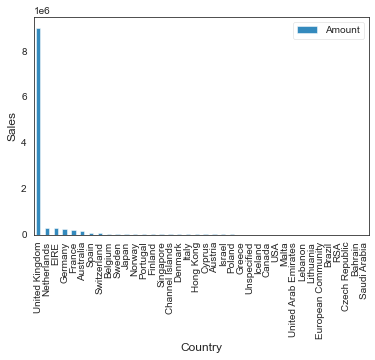

In [93]:
#show total sales per country
by_country = df_new.groupby(['Country'])[['Amount']].sum().sort_values('Amount', ascending=False)
ax = by_country.plot(kind='bar')
ax.set_ylabel("Sales");

### Which customer is buying most frequently?

In [94]:
# Customers with most no. of orders (invoices)
orders = df_new.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()
print('The TOP 5 loyal customers with the most number of orders...')
orders.sort_values(by='InvoiceNo', ascending=False).head()

The TOP 5 loyal customers with the most number of orders...


,CustomerID,Country,InvoiceNo
4018,17841.0,United Kingdom,7847
1887,14911.0,EIRE,5675
1297,14096.0,United Kingdom,5111
334,12748.0,United Kingdom,4595
1669,14606.0,United Kingdom,2700


### Number of orders per customer

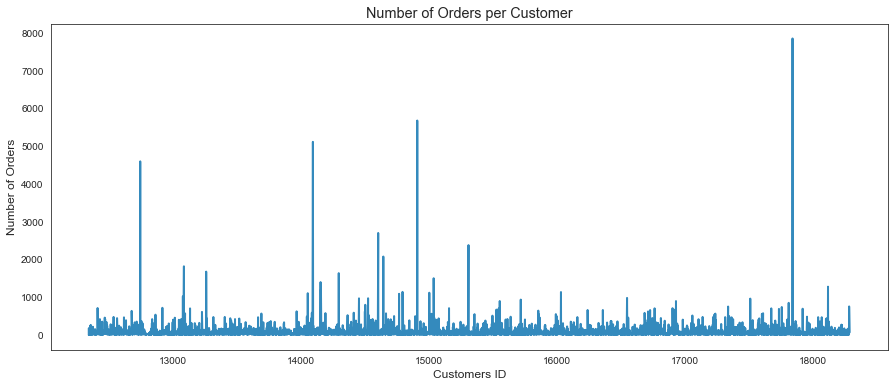

In [95]:
# Creating a subplot of size 15x6
plt.subplots(figsize=(15,6))

# X axis will denote the customer ID, Y axis will denote the number of orders
plt.plot(orders.CustomerID, orders.InvoiceNo)

# Labeling
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Customer')

plt.show()

### Which customer is spending the most? 

In [96]:
money_spent = df_new.groupby(by=['CustomerID','Country'], as_index=False)['Amount'].sum()
print('The TOP 5 profitable customers with highest money spent...')
money_spent.sort_values(by='Amount', ascending=False).head()

The TOP 5 profitable customers with highest money spent...


,CustomerID,Country,Amount
1697,14646.0,Netherlands,280206.02
4209,18102.0,United Kingdom,259657.30
3736,17450.0,United Kingdom,194550.79
3016,16446.0,United Kingdom,168472.50
1887,14911.0,EIRE,143825.06


### Money spent per customer 

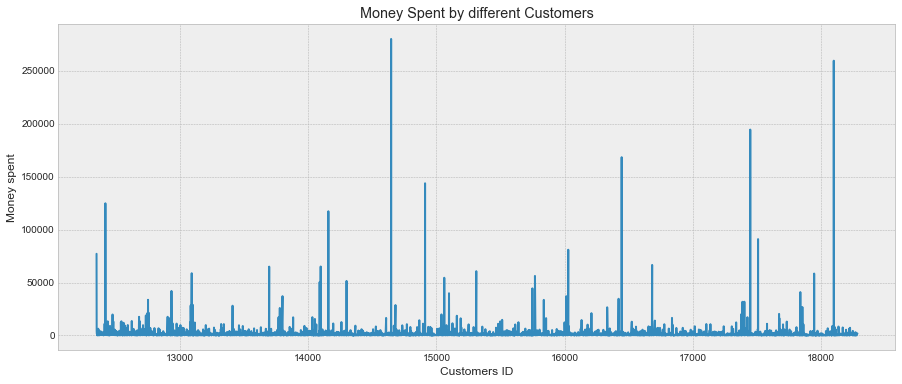

In [97]:
# Creating a subplot of size 15*6
plt.subplots(figsize=(15,6))

# X axis will denote the customer ID, Y axis will denote the amount spent
plt.plot(money_spent.CustomerID, money_spent.Amount)

# Labelling
plt.xlabel('Customers ID')
plt.ylabel('Money spent')
plt.title('Money Spent by different Customers')

plt.show()

## Purchase patterns based on date, time 

* In which month, the number of orders placed is the highest?
* On which Day of a week, the number of orders placed is the highest?
* At what time of the day, the store is the busiest?

In [98]:
import datetime

In [99]:
# Convert InvoiceDate to datetime
df_new['InvoiceDate'] = pd.to_datetime(df_new.InvoiceDate, format='%m/%d/%Y %H:%M')

# Creating a new feature called year_month, such that December 2010 will be denoted as 201012
df_new.insert(loc=2, column='year_month', value=df_new['InvoiceDate'].map(lambda x: 100*x.year + x.month))

# Creating a new feature for Month
df_new.insert(loc=3, column='month', value=df_new.InvoiceDate.dt.month)

# Creating a new feature for Day
# +1 to make Monday=1.....until Sunday=7
df_new.insert(loc=4, column='day', value=(df_new.InvoiceDate.dt.dayofweek)+1)

# Creating a new feature for Hour
df_new.insert(loc=5, column='hour', value=df_new.InvoiceDate.dt.hour)
df_new.head()

,InvoiceNo,StockCode,year_month,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,201012,12,3,8,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,201012,12,3,8,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,201012,12,3,8,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,201012,12,3,8,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,201012,12,3,8,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### How many orders are placed per month?

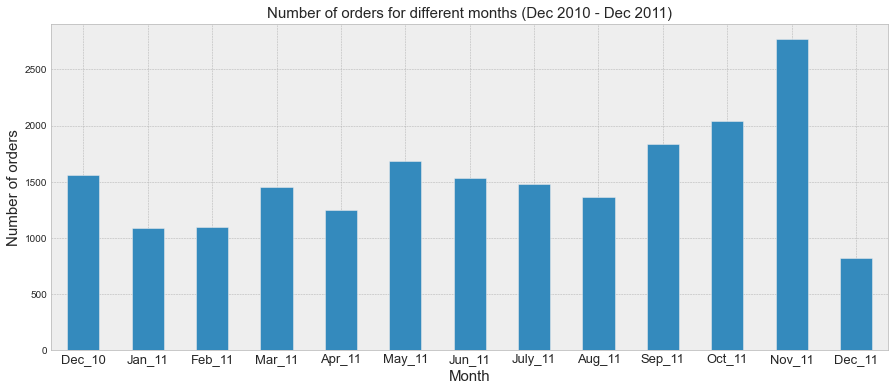

In [100]:
# Using groupby to extract No. of Invoices year-monthwise
ax = df_new.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))

# Labelling
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of orders',fontsize=15)
ax.set_title('Number of orders for different months (Dec 2010 - Dec 2011)',fontsize=15)

# X tick labels
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)

plt.show()

We can see that the highest number of orders are placed in November.
December 2011 has the lowest number of orders placed.

### How many orders are placed per day of the week?

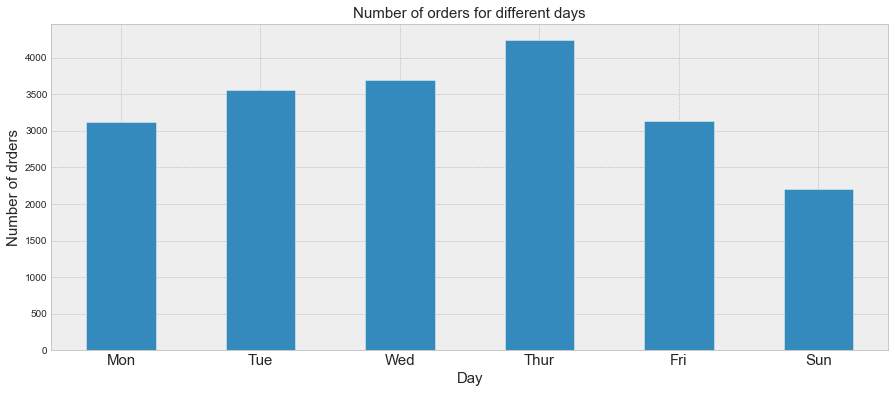

In [101]:
# Using groupby to count no. of Invoices daywise
ax = df_new.groupby('InvoiceNo')['day'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))

# Labelling 
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of drders',fontsize=15)
ax.set_title('Number of orders for different days',fontsize=15)

# X tick labels
# There are no orders placed on Saturdays, exclude Sat from xticklabels
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)

plt.show()

No order is placed in Saturdays. The most orders are placed on Thursday. 

### How many orders are placed per Hour?

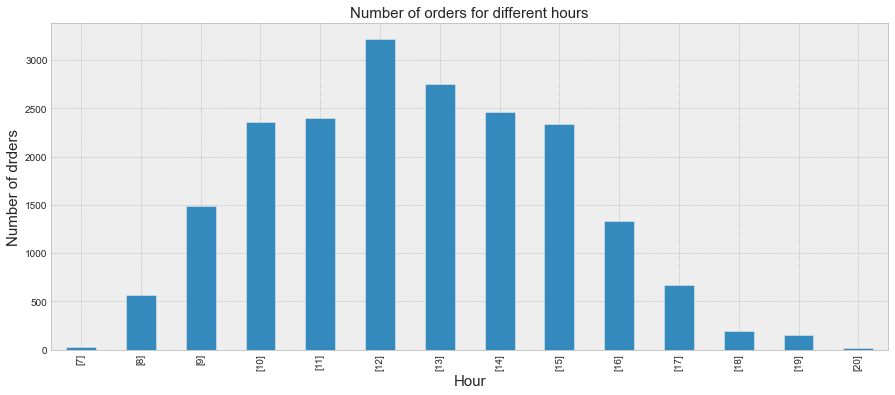

In [102]:
# Using groupby to count the no. of Invoices hourwise - Removed last two elements because of data error
ax = df_new.groupby('InvoiceNo')['hour'].unique().value_counts().iloc[:-2].sort_index().plot(kind='bar',figsize=(15,6))

# Labelling
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of drders',fontsize=15)
ax.set_title('Number of orders for different hours',fontsize=15)

plt.show()

Free items 

In [103]:
df_new.UnitPrice.describe()
# With minimum unit price < 0.001 must be incorrect entry or free items

count    530104.000000
mean          3.907625
std          35.915681
min           0.001000
25%           1.250000
50%           2.080000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64

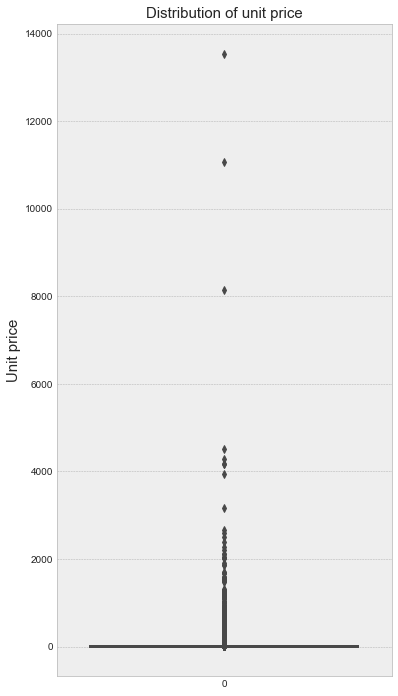

In [104]:
# checking the distribution of unit price
plt.subplots(figsize=(6,12))

# Applying boxplot visualization on Unit Price
ax = sns.boxplot(data=df_new.UnitPrice)

# Labelling
ax.set_ylabel('Unit price',fontsize=15)
ax.set_title('Distribution of unit price',fontsize=15)
plt.show()

In [105]:
# Creating a new df of free items
free_items = df_new[df_new['UnitPrice'] < 0.01]
free_items.shape

(4, 13)

In [106]:
free_items

,InvoiceNo,StockCode,year_month,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
157195,550193,PADS,201104,4,5,9,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.001,13952.0,United Kingdom,0.001
279045,561226,PADS,201107,7,2,10,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.001,15618.0,United Kingdom,0.001
359871,568200,PADS,201109,9,7,14,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.001,16198.0,United Kingdom,0.001
361741,568375,BANK CHARGES,201109,9,1,17,Bank Charges,1,2011-09-26 17:01:00,0.001,13405.0,United Kingdom,0.001


## Items Insights

* Which item is bought by most no. of customers?
* Which is the most sold item based on sum of sales?
* Which is the most sold item based on the count of orders?
* Which items are the first choice items for most no. of invoices?

### Most sold item based on Quantity

In [107]:
# Creating a new pivot table which sums the quantity ordered for each item
most_sold_items = df_new.pivot_table(index=['StockCode','Description'], values='Quantity', aggfunc='sum').sort_values(by='Quantity', ascending=False)
most_sold_items.reset_index(inplace=True)

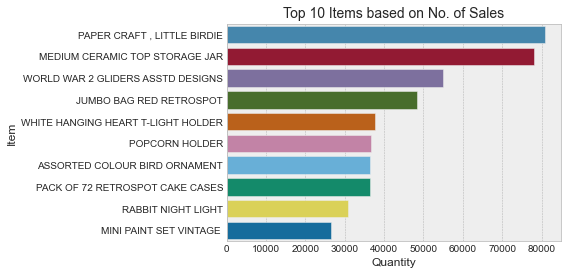

In [108]:
# Creating a bar plot of Description (item name) on the Y axis and the sum of Quantity on the X axis
# plotting only the 10 most ordered items
sns.barplot(y='Description', x='Quantity', data=most_sold_items.head(10))

plt.title('Top 10 Items based on No. of Sales', fontsize=14)
plt.ylabel('Item');

### Items bought by most number of customers 

In [109]:
# we can get number of times an items is purchased by counting the length of df as follows. 
# this example shows how to get number of times RABBIT NIGHT LIGHT is purchased 
df_item = df_new[df_new['Description']=='RABBIT NIGHT LIGHT']
df_item.shape

(1036, 13)

In [110]:
len(df_item.CustomerID.unique())

451

So RABBIT NIGHT LIGHT was purchased by 451 customers.

In [111]:
# apply this to get purchase count for all items by
# Creating a pivot table that displays the sum of unique Customers who bought particular item

bought_by_most_customers = df_new.pivot_table(index=['StockCode','Description'], values='CustomerID', aggfunc=lambda x: len(x.unique())).sort_values(by='CustomerID', ascending=False)
bought_by_most_customers

,,CustomerID
StockCode,Description,
22423,REGENCY CAKESTAND 3 TIER,882
85123A,WHITE HANGING HEART T-LIGHT HOLDER,857
47566,PARTY BUNTING,709
84879,ASSORTED COLOUR BIRD ORNAMENT,679
22720,SET OF 3 CAKE TINS PANTRY DESIGN,641
...,...,...
23104,IVORY PANTRY HANGING LAMP,1
84963A,PINK PAINTED KASHMIRI CHAIR,1
84963B,BLUE PAINTED KASHMIRI CHAIR,1


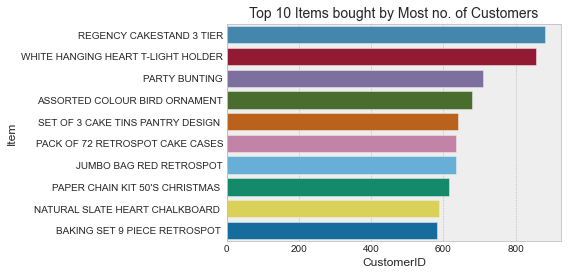

In [113]:
bought_by_most_customers.reset_index(inplace=True)

# Creating a bar plot of Description ( or the item ) on the Y axis and the sum of unique Customers on the X axis
# We are plotting only the 10 most bought items
sns.barplot(y='Description', x='CustomerID', data=bought_by_most_customers.head(10))

plt.title('Top 10 Items bought by Most no. of Customers', fontsize=14)
plt.ylabel('Item');

### Most frequently ordered items





TBU

### Top 10 First Choices 

In [123]:
# Storing all the invoice numbers into a list y
y = df_new['InvoiceNo']
y = y.to_list()

# Length of y
len(y)

530104

In [124]:
# Using set function to find unique invoice numbers only and storing them in invoices list
invoices = list(set(y))

# Lenght of invoices (count of unique invoices)
len(invoices)

19960

In [125]:
# Creating empty list first_choices
first_choices = []

# looping into list of unique invoice numbers
for i in invoices:
    
    # the first item (index = 0) of every invoice is the first purchase
    # extracting the item name for the first purchase
    first_purchase = df_new[df_new['InvoiceNo']==i]['items'].reset_index(drop=True)[0]
    
    # Appending the first purchase name into first choices list
    first_choices.append(first_purchase)

In [126]:
first_choices[:3]

['RABBIT_NIGHT_LIGHT',
 'ASSORTED_COLOUR_MINI_CASES',
 'EMBOSSED_GLASS_TEALIGHT_HOLDER']

In [127]:
# Length of first_choices mathches the lenght of invoices
len(first_choices)

19960

In [130]:
# Using counter to count repeating first choices
count = Counter(first_choices)
count

Counter({'RABBIT_NIGHT_LIGHT': 156,
         'ASSORTED_COLOUR_MINI_CASES': 25,
         'EMBOSSED_GLASS_TEALIGHT_HOLDER': 10,
         'STRAWBERRY_CHARLOTTE_BAG': 14,
         'CARD_BIRTHDAY_COWBOY': 5,
         'ZINC_HERB_GARDEN_CONTAINER': 16,
         'PINK_VINTAGE_PAISLEY_PICNIC_BAG': 12,
         'ROMANTIC_PINKS_RIBBONS_': 3,
         "PAPER_CHAIN_KIT_50'S_CHRISTMAS_": 100,
         'COOK_WITH_WINE_METAL_SIGN_': 26,
         'DOORMAT_NEW_ENGLAND': 48,
         'SILVER_CHRISTMAS_TREE_BAUBLE_STAND_': 7,
         'ANTIQUE_GLASS_PEDESTAL_BOWL': 9,
         'RED_GINGHAM_ROSE_JEWELLERY_BOX': 16,
         'REX_CASH+CARRY_JUMBO_SHOPPER': 68,
         'ROUND_SNACK_BOXES_SET_OF4_WOODLAND_': 21,
         'CHRISTMAS_CARD_SCREEN_PRINT_': 6,
         'ZINC_METAL_HEART_DECORATION': 36,
         'Manual': 149,
         'FELTCRAFT_CUSHION_RABBIT': 13,
         'BLUE_HARMONICA_IN_BOX_': 16,
         'GARDENERS_KNEELING_PAD_CUP_OF_TEA_': 22,
         'PACK_OF_12_RED_RETROSPOT_TISSUES_': 6,
         

In [131]:
# Storing the counter into a datafrane
df_first_choices = pd.DataFrame.from_dict(count, orient='index').reset_index()

# Rename columns as item and count
df_first_choices.rename(columns={'index':'item', 0:'count'},inplace=True)

# Sorting the df based on count
df_first_choices.sort_values(by='count',ascending=False)

,item,count
192,REGENCY_CAKESTAND_3_TIER,207
35,WHITE_HANGING_HEART_T-LIGHT_HOLDER,182
0,RABBIT_NIGHT_LIGHT,156
18,Manual,149
88,POSTAGE,136
...,...,...
2063,ASSORTED_TUTTI_FRUTTI_HEART_BOX,1
2064,PURPLE_PAPER_PARASOL,1
2071,DOGGY_RUBBER,1
2074,CHRISTMAS_CARD_SINGING_ANGEL,1


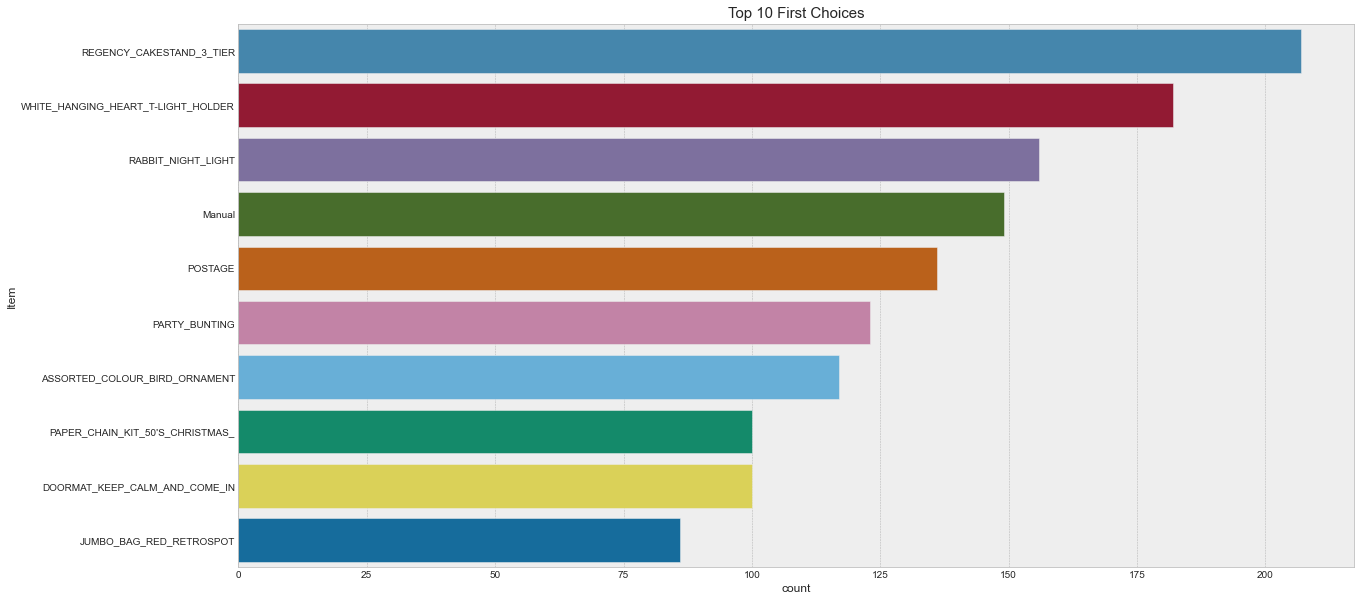

In [133]:
plt.subplots(figsize=(20,10))

# Creating a bar plot that displays Item name on the Y axis and Count on the X axis
sns.barplot(y='item', x='count', data=df_first_choices.sort_values(by='count',ascending=False).head(10))

plt.title('Top 10 First Choices', fontsize=15)
plt.ylabel('Item');